In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import datetime
data = 'data/data.csv'



In [2]:

data = pd.read_csv(data)
data.head()

,DATE,TIME,LOCATION,OPERATOR,FLIGHT#,ROUTE,AIRCRAFT_TYPE,AIRCRAFT_REG,CN_LN,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,SUMMARY_OF_EVENTS
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army Air Forces,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",Unknown,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [3]:
data.drop(['TIME', 'FLIGHT#', 'AIRCRAFT_REG', 'CN_LN', 'SUMMARY_OF_EVENTS'], axis='columns', inplace=True)
data.head()

,DATE,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army Air Forces,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,09/07/1909,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,07/12/1912,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,08/06/1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,09/09/1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0


In [4]:
data.fillna(0, inplace=True)
data.head()

,DATE,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army Air Forces,Demonstration,Wright Flyer III,2.0,1.0,1.0,1.0,1.0,0.0,0.0
1,09/07/1909,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,07/12/1912,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,0.0,5.0,5.0,0.0,5.0,0.0
3,08/06/1913,"Victoria, British Columbia, Canada",Private,0,Curtiss seaplane,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,09/09/1913,Over the North Sea,Military - German Navy,0,Zeppelin L-1 (airship),20.0,0.0,0.0,14.0,0.0,0.0,0.0


In [5]:
#converted DATE column to date dataset 
data['DATE']=pd.to_datetime(data.DATE)

In [6]:
#once converted, I broke the date off by year.
t_year=data['DATE'].dt.year.copy()
t_year

0       1908
1       1909
2       1912
3       1913
4       1913
        ... 
4970    2019
4971    2019
4972    2020
4973    2020
4974    2020
Name: DATE, Length: 4975, dtype: int64

In [7]:
#I broked the years into an eleven year frame
t_start_date1=pd.to_datetime('1915')
t_end_date1=pd.to_datetime('1925')

t_timeframe1=data[data.DATE.between(t_start_date1, t_end_date1)].copy()
t_year=t_timeframe1['DATE'].dt.year

In [8]:
#I split the operator type based off to types of operators and put the addtional inforamtion into a column describing their origin
t_timeframe1[['Type', 'Origin']]=t_timeframe1['OPERATOR'].str.split('-', n=1, expand=True).copy()
t_timeframe1.head()


,DATE,LOCATION,OPERATOR,ROUTE,AIRCRAFT_TYPE,TOTAL_ONBOARD,PASSENGER_ONBOARD,CREW_ONBOARD,TOTAL_FATALITIES,PASSENGER_FATALITIES,CREW_FATALITIES,GROUND_CASUALTIES,Type,Origin
6,1915-03-05,"Tienen, Belgium",Military - German Navy,0,Zeppelin L-8 (airship),41.0,0.0,0.0,21.0,0.0,0.0,0.0,Military,German Navy
7,1915-09-03,"Off Cuxhaven, Germany",Military - German Navy,0,Zeppelin L-10 (airship),19.0,0.0,0.0,19.0,0.0,0.0,0.0,Military,German Navy
8,1916-07-28,"Near Jambol, Bulgeria",Military - German Army,0,Schutte-Lanz S-L-10 (airship),20.0,0.0,0.0,20.0,0.0,0.0,0.0,Military,German Army
9,1916-09-24,"Billericay, England",Military - German Navy,0,Zeppelin L-32 (airship),22.0,0.0,0.0,22.0,0.0,0.0,0.0,Military,German Navy
10,1916-10-01,"Potters Bar, England",Military - German Navy,0,Zeppelin L-31 (airship),19.0,0.0,19.0,19.0,0.0,19.0,0.0,Military,German Navy


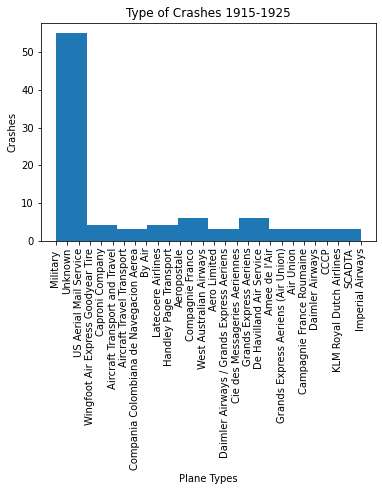

In [12]:
#Created a histogram to show the amount of differing crashes in that timeframe
plt.title('Type of Crashes 1915-1925')
plt.hist(t_timeframe1['Type'])
plt.ylabel("Crashes")
plt.xlabel('Plane Types')
plt.xticks(rotation='vertical')



plt.show()

In [220]:
#I checked the data types for the upcoming charts
t_timeframe1.dtypes


DATE                    datetime64[ns]
LOCATION                        object
OPERATOR                        object
ROUTE                           object
AIRCRAFT_TYPE                   object
TOTAL_ONBOARD                  float64
PASSENGER_ONBOARD              float64
CREW_ONBOARD                   float64
TOTAL_FATALITIES               float64
PASSENGER_FATALITIES           float64
CREW_FATALITIES                float64
GROUND_CASUALTIES              float64
Type                            object
Origin                          object
dtype: object

<BarContainer object of 11 artists>

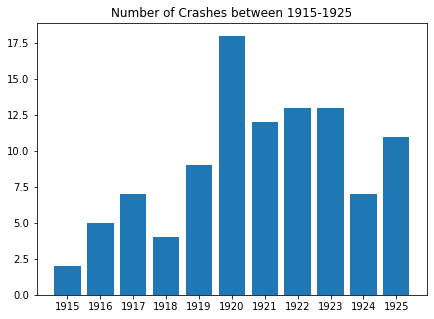

In [13]:
#Showed the amount of crashes over the year span per year
fig=plt.figure(figsize=(7,5))
t_year=np.array(['1915','1916','1917','1918','1919','1920','1921','1922','1923','1924','1925'])
t_crashes=np.array([2, 5, 7, 4, 9, 18, 12, 13, 13, 7, 11])
positions=np.array( [0, 2, 4, 6, 8, 10, 12])
plt.title("Number of Crashes between 1915-1925")
plt.bar(t_year, t_crashes)



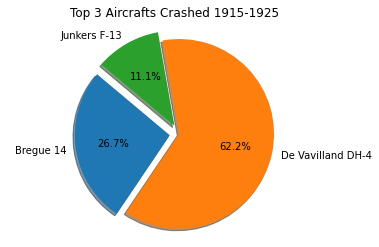

In [15]:
#Showed the pie chart showing top 3 types of planes were involved in crashes
pies = ["Bregue 14", "De Vavilland DH-4", "Junkers F-13"]
pie_votes = [12,28,5]
explode = (0.1,0,0.1,)
plt.pie(pie_votes, explode=explode, labels=pies, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis("equal")
plt.title ("Top 3 Aircrafts Crashed 1915-1925")

plt.show()


In [16]:
converted=str('Origin')

In [17]:
#counted the number of values in the columns to ensure they matched for a scatter plot. 
t_timeframe1['TOTAL_FATALITIES'].count()


90

In [21]:
t_timeframe1['TOTAL_ONBOARD'].count()

90

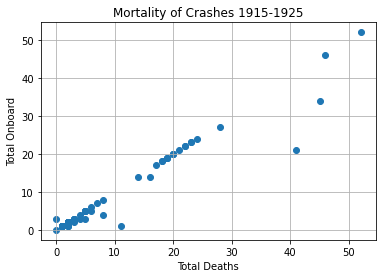

In [19]:
#created a scatterplot to show the rate of deaths vs those onboard 
plt.scatter(t_timeframe1["TOTAL_ONBOARD"], t_timeframe1["TOTAL_FATALITIES"], marker="o")
plt.title("Mortality of Crashes 1915-1925")
plt.ylabel("Total Onboard")
plt.xlabel("Total Deaths")
plt.grid(True)

plt.show()